**Introduction**

Whenever World Cup is coming up, every soccer fan around the world is eager to make his prediction on what team will win the match. Another looming question for the fans is how their favorite national teams should line up: What formation should be used? Which players should be chosen? Which ones should be left on the bench or eliminated from the tournament? and so much more. 
In this analysis, we shall be dealing with a preliminary data of FIFA 2018. it contain a total of 74 columns with 17981 entries with various interesting features such as player value, wage, age, and performance rating that I really dig into.

After loading the data, I chose only the most interesting columns that will directly address our major questions of the study

**Questions to be Answered**

1.    Prepare a rank-ordered list of the top 10 countries with the most players. List 5 countries that are producing the most numbers of footballers that play at this level?

2. Interpret the age after which a player stops improving.

3. Which type of offensive player tends to get paid the most: the striker, the right-winger, or the left-winger? Visualize through a scatter plot for all three.

4.  Top 5 players for every preferred position in terms of overall as well as potential points. Who was the best in 2018?

5. Which club(s) has the maximum share of players from England? Which club(s) has the maximum share of players from Spain? Which club(s) have the maximum share of players from Germany?

6. As a National coach of the France team, you want to compare the national team of England, Spain, Italy, and Germany to understand the competition. The formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3 forwards, 1 Goal Keeper) and players with an overall value of more than 75 are preferred, now form the best team for each of the mentioned countries and compare them. Note down all the insights that you as a business analyst should share with the coach.

To dive into the questions above, we shall first carry out a number of analysis as a whole to understand the data set and later get into our questions.



In [1]:
!pip install chart_studio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.2 MB/s 


**import libraries**

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import chart_studio.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

**using google colab to load dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving FIFA.xlsx to FIFA.xlsx


**Read data**

In [4]:
import io
FIFA = pd.read_excel(io.BytesIO(uploaded['FIFA.xlsx']))

Before drive into our main questions to be answered here, lets first explore the data as a whole

In [5]:
# querying for the columns available
FIFA.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [6]:
# querying for the shape
FIFA.shape

(17981, 74)

**Since the columns are too many, lets select only those that will be of interest to us**

In [7]:
# querying for the columns

interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions',
]
FIFA18 = pd.DataFrame(FIFA, columns=interesting_columns)

**Data summary** 

In [8]:
FIFA18.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95.5M,565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,105M,565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123M,280K,LW
3,L. SuÃ¡rez,30,Uruguay,92,92,FC Barcelona,97M,510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61M,230K,GK


In [9]:
FIFA18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17733 non-null  object
 6   Value                17981 non-null  object
 7   Wage                 17981 non-null  object
 8   Preferred Positions  17981 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [10]:
# querying for duplicates

FIFA18[FIFA18.duplicated()].count()

Name                   52
Age                    52
Nationality            52
Overall                52
Potential              52
Club                   52
Value                  52
Wage                   52
Preferred Positions    52
dtype: int64

In [11]:
# querying for total of null data in each column

FIFA18.isnull().sum()

Name                     0
Age                      0
Nationality              0
Overall                  0
Potential                0
Club                   248
Value                    0
Wage                     0
Preferred Positions      0
dtype: int64

**Club has 52 null values**

In [12]:
# Looking at the analysis of duplicate data, it mean a player can play for more than club and there are so many different teams in the same country, hence we can not determine the null value of the club, the best treatment would be to delete them because a player much belong to a club for him to play
FIFA18.dropna(subset=['Club'],inplace=True)
# checking for null values again
FIFA18.isnull().sum()

Name                   0
Age                    0
Nationality            0
Overall                0
Potential              0
Club                   0
Value                  0
Wage                   0
Preferred Positions    0
dtype: int64

In [13]:
# A quick summary of all the data columns

# FIFA18.describe()
FIFA18.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,17733,16747,J. RodrÃ­guez,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,17733.0,NaN,NaN,NaN,25.109401,4.609863,16.0,21.0,25.0,28.0,47.0
Nationality,17733,164,England,1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall,17733.0,NaN,NaN,NaN,66.232786,7.001454,46.0,62.0,66.0,71.0,94.0
Potential,17733.0,NaN,NaN,NaN,71.211978,6.106766,46.0,67.0,71.0,75.0,94.0
Club,17733,647,Villarreal CF,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,17733,207,1.1M,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wage,17733,141,1K,4201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Preferred Positions,17733,793,CB,2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Quick Insights**
*  The most frequent Nationality is england with a frequency of 1630
*  The most preferred position is CB as seen from the description with a frequency of 2180
*   Most of the players earn a salary of about 1k
*  overall min is 46 to 94 max







In [14]:
# digging into the above inslight, looking at value counts for non-numeric features only

num_to_display = 10  
for colname in FIFA18.dtypes[FIFA18.dtypes == 'object'].index:
    val_counts = FIFA18[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

J. RodrÃ­guez    7
J. Williams      7
J. Valencia      7
Felipe           6
Paulinho         6
Danilo           6
Wanderson        6
J. Jones         6
J. Ãlvarez      5
D. RodrÃ­guez    5
Name: Name, dtype: int64
Only displaying first 10 of 16747 values.



England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          809
Italy           799
Colombia        591
Japan           469
Netherlands     429
Name: Nationality, dtype: int64
Only displaying first 10 of 164 values.



Villarreal CF         35
OGC Nice              34
Borussia Dortmund     34
VfL Wolfsburg         34
FC Nantes             34
UD Las Palmas         34
Olympique Lyonnais    34
Manchester United     34
Manchester City       33
Arsenal               33
Name: Club, dtype: int64
Only displaying first 10 of 647 values.



1.1M    387
425K    362
350K    358
1.2M    343
375K    338
525K    328
325K    315
400K    305
1M      303
475K    298
Name: Value, dtype: int64
O

# Data Vistulization
### Preferred Position

In [15]:
FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]

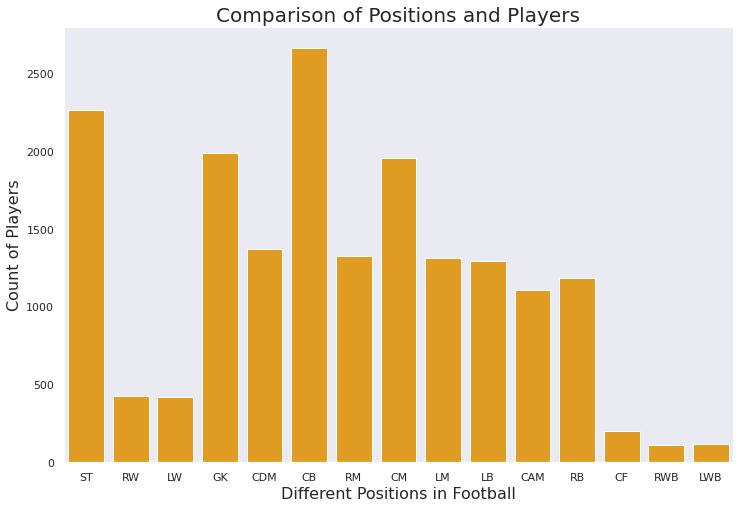

In [16]:
# different positions acquired by the players 

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = FIFA18, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()


**Here, the 4 most common preferred positions of the players are Center Back, Striker, Goalkeeper, and Center Midfielder, in that respective order**



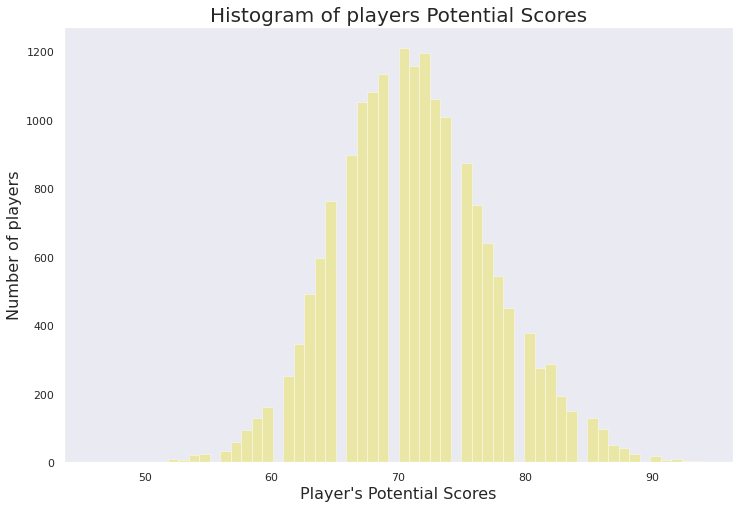

In [17]:
# To show Different potential scores of the players participating in the FIFA 2019

x = FIFA18.Potential
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

### grouping by age



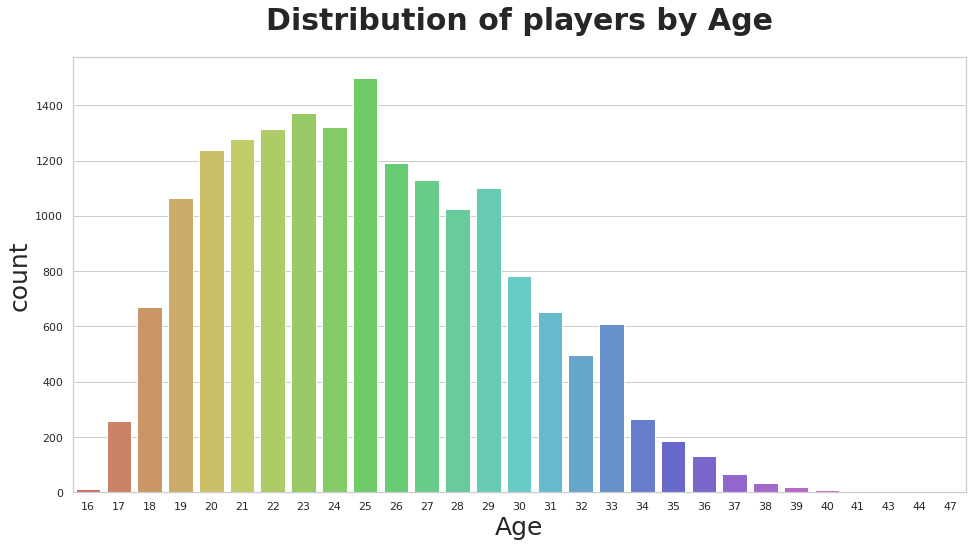

In [18]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Distribution of players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA18, palette="hls");
plt.show()

**majarity of players are 25years of age**

## grouping by overall

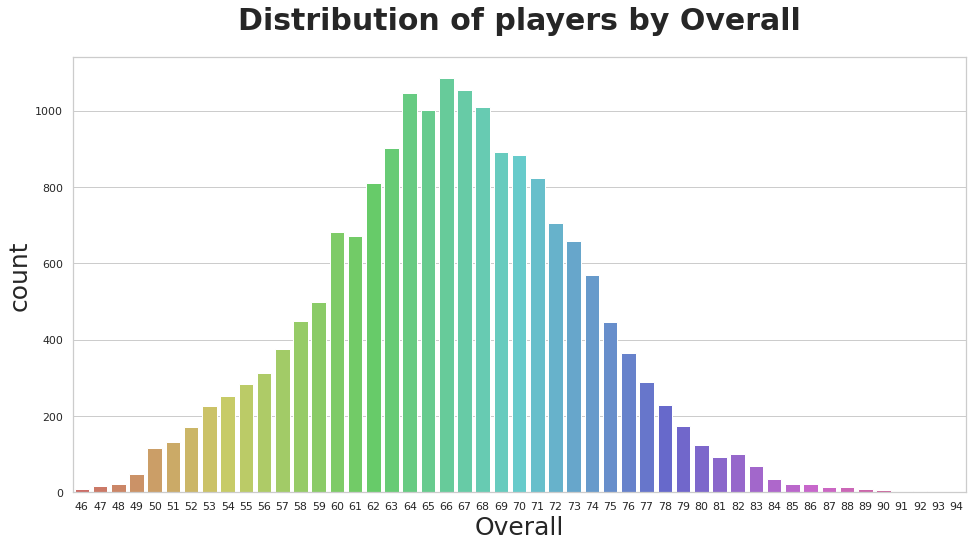

In [19]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Distribution of players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Overall", data=FIFA18, palette="hls");
plt.show()

**This plot shows a normal distribution, with the average overall rating of 66**

Text(0.5, 1.0, 'PIE CHART SHOWING FREQUENCY OF THE TOP COUNTRY')

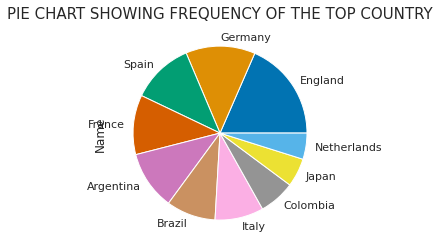

In [20]:
# pie chart
FIFA18.groupby("Nationality").Name.count().sort_values(ascending=False).head(10).plot(kind="pie");
plt.title('PIE CHART SHOWING FREQUENCY OF THE TOP COUNTRY', fontsize=15)


**As seen above, most players are from england**

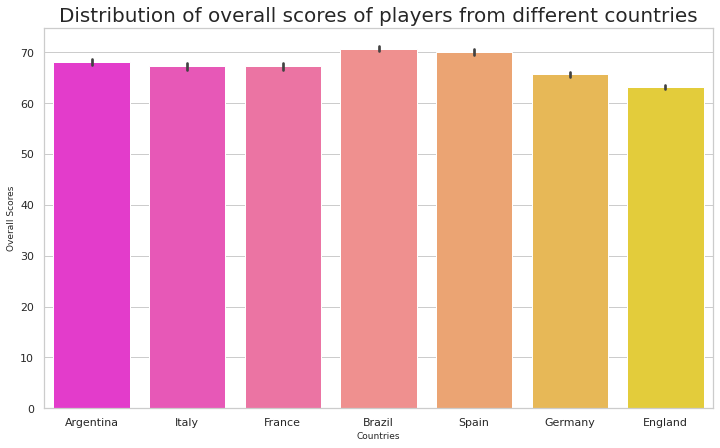

In [21]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = FIFA18.loc[FIFA18['Nationality'].isin(some_countries) & FIFA18['Overall']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()


**players from Brazil has the highest overall score as seen from the plot above**

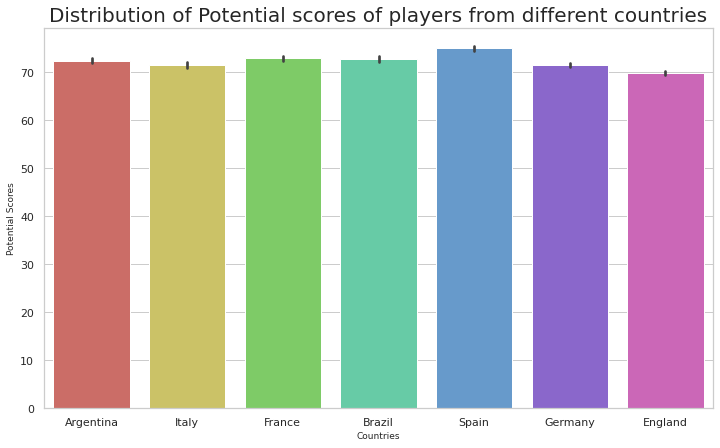

In [22]:
# Every Nations' Player and their Potential scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = FIFA18.loc[FIFA18['Nationality'].isin(some_countries) & FIFA18['Potential']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Potential'], palette = 'hls')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Potential Scores', fontsize = 9)
ax.set_title(label = 'Distribution of Potential scores of players from different countries', fontsize = 20)
plt.show()

In [23]:
FIFA18['Club'].value_counts().head(10)


Villarreal CF         35
OGC Nice              34
Borussia Dortmund     34
VfL Wolfsburg         34
FC Nantes             34
UD Las Palmas         34
Olympique Lyonnais    34
Manchester United     34
Manchester City       33
Arsenal               33
Name: Club, dtype: int64

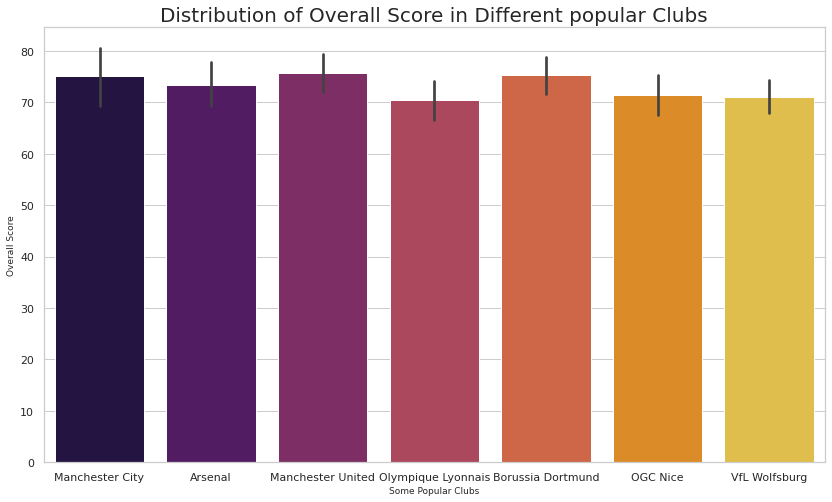

In [24]:
some_clubs = ('Villarreal  CF', 'OGC Nice', 'Borussia Dortmund', 'VfL Wolfsburg', 'FC Nantes'
             'UD Las Palmas', 'Olympique Lyonnais', 'Manchester United', 'Manchester City', 'Arsenal')

data_clubs = FIFA18.loc[FIFA18['Club'].isin(some_clubs) & FIFA18['Overall']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.show()

**Manchester United has the highest overall core as seen in the plot above**

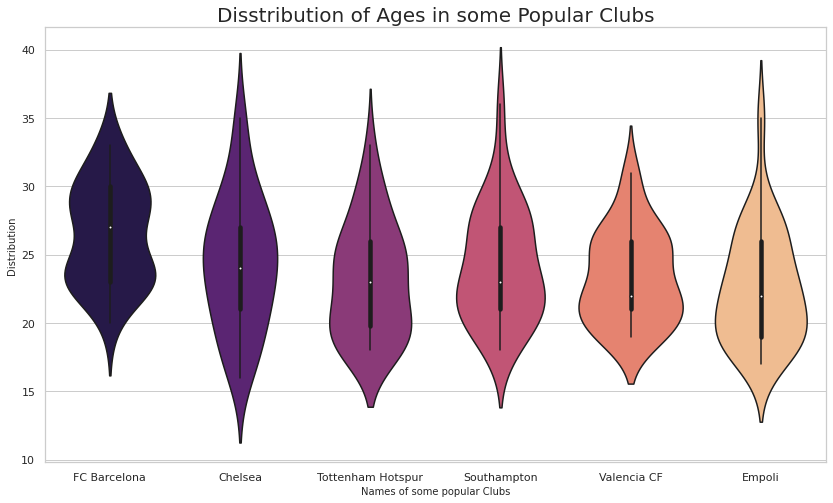

In [25]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = FIFA18.loc[FIFA18['Club'].isin(some_clubs) & FIFA18['Wage']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.show()



**15 youngest Players from the FIFA 2018**

In [26]:
# finding 15 youngest Players from the dataset

youngest = FIFA18.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                Name  Age                   Club  Nationality
10556      K. Pierie   16          SC Heerenveen  Netherlands
15119  L. Geertruida   16              Feyenoord  Netherlands
15571  Javi VÃ¡zquez   16      Sevilla AtlÃ©tico        Spain
17667        J. Hove   16                Sogndal       Norway
15968     E. HÃ¥land   16               Molde FK       Norway
11397       A. Gomes   16      Manchester United      England
17014    R. Strechie   16  F.B.C. Unione Venezia      Romania
16116      M. Sprang   16            FSV Zwickau      Germany
13733     E. Vignato   16          Chievo Verona        Italy
15837      J. Romero   16     AtlÃ©tico TucumÃ¡n    Argentina
15063   G. McEachran   16                Chelsea      England
17055     V. Barbero   16   Belgrano de CÃ³rdoba    Argentina
17025      L. Pintor   16      Stade Brestois 29       France
16988       N. Perry   17              AIK Solna       Sweden
16809       P. Vagic   17              MalmÃ¶ FF       Sweden


**15 Eldest Players from FIFA 2019**

In [27]:
# finding 15 eldest players from the dataset

eldest = FIFA18.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                Name  Age                       Club Nationality
17977  B. Richardson   47          Wycombe Wanderers     England
4839       O. PÃ©rez   44                    Pachuca      Mexico
5314    E. El Hadary   44                 Al Taawoun       Egypt
16834      J. Walker   43               Lincoln City     England
16696       D. Coyne   43                 Shrewsbury       Wales
16121         C. Day   41                  Stevenage     England
6654            Quim   41                    CD Aves    Portugal
7727      K. WÃ¦hler   41                    Sogndal      Norway
13863       M. Brown   40                  Port Vale     England
2224        B. Nivet   40               ES Troyes AC      France
3309      M. Candelo   40  Asociacion Deportivo Cali    Colombia
3148       T. Simons   40             Club Brugge KV     Belgium
1408      M. Storari   40                      Milan       Italy
16584       W. Brown   40              Oxford United     England
12169       M. Tyler   40

**Clubs with highest number of different countries**

In [28]:
# visualizing clubs with highest number of different countries

clubFreq = FIFA18.groupby(FIFA18['Club'])['Nationality'].nunique().sort_values(ascending = False)

#Passing the series into a dataframe and adding column names  
clubFreq = pd.DataFrame({'Club':clubFreq.index, 'NUMBER_OF_DIFFERENT COUNTRIES':clubFreq.values})

clubFreq[0:10]


,Club,NUMBER_OF_DIFFERENT COUNTRIES
0,Bologna,18
1,Watford,18
2,KV Oostende,17
3,Crystal Palace,17
4,West Ham United,17
5,AS Monaco,17
6,Fulham,17
7,Udinese,17
8,Borussia Dortmund,17
9,Eintracht Frankfurt,17


**Has seen above, Bologna club has the highest number of players from different country**

**Clubs with lowest number of different countries**

In [29]:
clubFreq = FIFA18.groupby(FIFA18['Club'])['Nationality'].nunique().sort_values(ascending = True)

#Passing the series into a dataframe and adding column names  
clubFreq = pd.DataFrame({'Club':clubFreq.index, 'NUMBER_OF_DIFFERENT COUNTRIES':clubFreq.values})

clubFreq[0:10]

,Club,NUMBER_OF_DIFFERENT COUNTRIES
0,CuricÃ³ Unido,1
1,CD Palestino,1
2,CD O'Higgins,1
3,CD Huachipato,1
4,CD Antofagasta,1
5,SÃ£o Paulo Futebol Clube,1
6,VitÃ³ria,1
7,Guadalajara,1
8,GrÃªmio Foot-Ball Porto Alegrense,1
9,Everton de ViÃ±a del Mar,1


**The table above shows that the top top clubs with players only from the same country that is to say same nationality**

In [30]:
# visualizing clubs with lowest number of different countries

FIFA18.groupby(FIFA18['Club'])['Nationality'].nunique().sort_values(ascending = True)

Club
CuricÃ³ Unido      1
CD Palestino       1
CD O'Higgins       1
CD Huachipato      1
CD Antofagasta     1
                  ..
Udinese           17
Fulham            17
AS Monaco         17
Watford           18
Bologna           18
Name: Nationality, Length: 647, dtype: int64

# 1. Prepare a rank-ordered list of the top 10 countries with the most players. List 5 countries that are producing the most numbers of footballers that play at this level?

In [31]:
# group dataset by country
grouped_by_country = FIFA18.groupby(['Nationality'])

In [32]:
# from the grouped data, we get the count of each country including its name
country_data = grouped_by_country.size()


In [33]:
# sort data from biggest to smallest
sorted_country_data = country_data.sort_values(ascending=False)


In [34]:
# convert the pandas series to list
sorted_country_data_list = sorted_country_data.reset_index().values.tolist()


In [35]:
# get the top 10 countries with most players
top_10_most_players = sorted_country_data_list[0:10]

In [36]:
print("Top 10 countries with the most players")
i = 1
for country in top_10_most_players:
    print('Top {}: {} - {} Players'.format(i,country[0],country[1]))
    i += 1

Top 10 countries with the most players
Top 1: England - 1630 Players
Top 2: Germany - 1140 Players
Top 3: Spain - 1019 Players
Top 4: France - 978 Players
Top 5: Argentina - 965 Players
Top 6: Brazil - 809 Players
Top 7: Italy - 799 Players
Top 8: Colombia - 591 Players
Top 9: Japan - 469 Players
Top 10: Netherlands - 429 Players


In [37]:
# get the top 10 countries with most players
top_5_most_players = sorted_country_data_list[0:5]

In [38]:
print("Top 5 countries with the most players")
i = 1
for country in top_5_most_players:
    print('Top {}: {} - {} Players'.format(i,country[0],country[1]))
    i += 1

Top 5 countries with the most players
Top 1: England - 1630 Players
Top 2: Germany - 1140 Players
Top 3: Spain - 1019 Players
Top 4: France - 978 Players
Top 5: Argentina - 965 Players


## 2. Which type of offensive player tends to get paid the most: the striker, the right-winger, or the left-winger? Visualize through a scatter plot for all three.

As seen can, values in columns: 'Value' and 'Wage' aren't numeric but objects. Thus it need to be  preprocess to make it usable.

In [39]:
# using a function to convert the values in those two columns into numbers. hence we end up having two new columns 'ValueNum' and 'WageNum' containing numeric values.
def str2number(amount):
    if type(amount) == int:
        return amount
    
    if amount[-1] == 'M':
        d = float(amount[:-1])
        
        return d*1000000
    elif amount[-1] == 'K':
        d = float(amount[:-1])
        return d*1000
    else:
        d = float(amount[:])
        return d

# applying the function to the wage column
    
FIFA18['ValueNum'] = FIFA18['Value'].apply(lambda x: str2number(x))
FIFA18['WageNum'] = FIFA18['Wage'].apply(lambda x: str2number(x))
FIFA18['WageNum'].head()


0    565000.0
1    565000.0
2    280000.0
3    510000.0
4    230000.0
Name: WageNum, dtype: float64

**Scatterplot of the striker, the right-winger, or the left-wing**

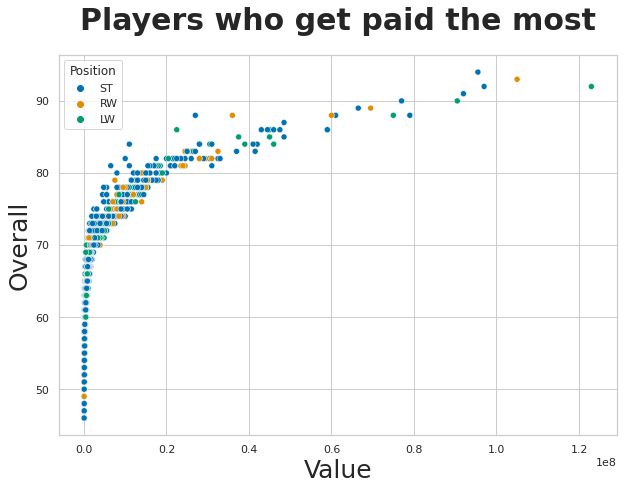

In [40]:
plt.figure(figsize=(10,7))
# sns.set_style("whitegrid")
plt.title('Players who get paid the most', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Value', fontsize=25)
plt.ylabel('Overall', fontsize=25)
sns.scatterplot(x='ValueNum', y='Overall', hue='Position', data=FIFA18.loc[FIFA18['Position'].isin(['ST', 'RW', 'LW'])])
plt.show()

**From the plot, we can see that Left winger gets paid the most follow by right winger and the sticker last.**

## grouping by value

**Value**
lets also look at the top 15 players with the most value

In [41]:
sorted_players = FIFA18.sort_values(["ValueNum"], ascending=False)[0:10]
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].values

In [42]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Value
Neymar,25,Brazil,Paris Saint-Germain,LW,123M
L. Messi,30,Argentina,FC Barcelona,RW,105M
L. SuÃ¡rez,30,Uruguay,FC Barcelona,ST,97M
Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,95.5M
R. Lewandowski,28,Poland,FC Bayern Munich,ST,92M
E. Hazard,26,Belgium,Chelsea,LW,90.5M
K. De Bruyne,26,Belgium,Manchester City,RM,83M
T. Kroos,27,Germany,Real Madrid CF,CDM,79M
P. Dybala,23,Argentina,Juventus,ST,79M
G. HiguaÃ­n,29,Argentina,Juventus,ST,77M


## Wage
### Exploring top 15 players with the highest wage

In [43]:
sorted_players = FIFA18.sort_values(["WageNum"], ascending=False)[0:15]
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].values

In [44]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Wage
Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,565K
L. Messi,30,Argentina,FC Barcelona,RW,565K
L. SuÃ¡rez,30,Uruguay,FC Barcelona,ST,510K
G. Bale,27,Wales,Real Madrid CF,RW,370K
R. Lewandowski,28,Poland,FC Bayern Munich,ST,355K
L. ModriÄ‡,31,Croatia,Real Madrid CF,CDM,340K
T. Kroos,27,Germany,Real Madrid CF,CDM,340K
S. AgÃ¼ero,29,Argentina,Manchester City,ST,325K
Sergio Ramos,31,Spain,Real Madrid CF,CB,310K
K. Benzema,29,France,Real Madrid CF,ST,295K


# 3. Interpret the age after which a player stops improving



**scatter chart of the players' Value with respect to their Age and Overall**

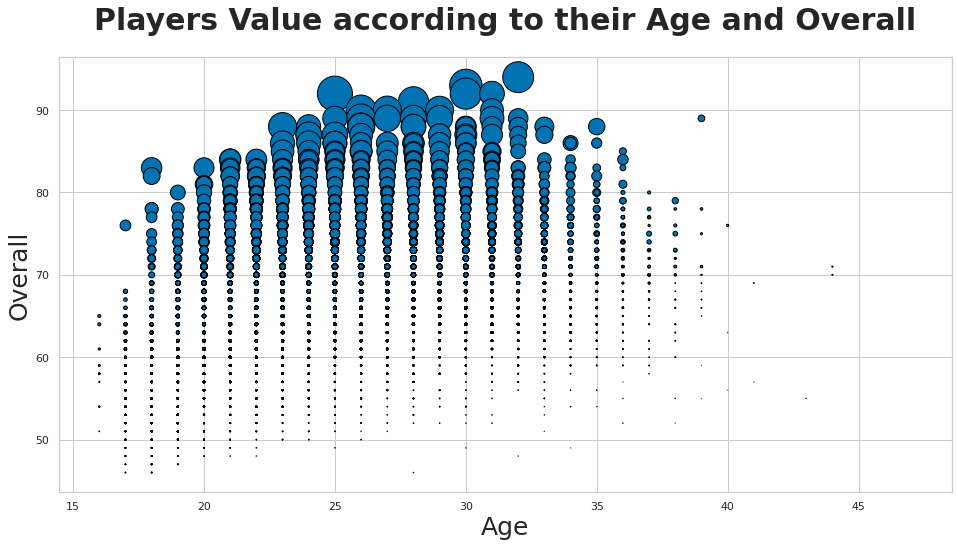

In [45]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

 
*   From the above plot, the peak value seen to fall accordingingly to the age range 28-33 and the overall rating of 90+
*   You can also see that most of the prayers are are highly valuble from age 20 to 35 years and beyond that, their rating starts reducing without an increase which means beyond the age of 35, they iterally stop improving.
The peak value seen to fall accordingingly to the age range 28-33 and the overall rating of 90+

**scatter chart of the players' Wage with respect to their Age and Overall**

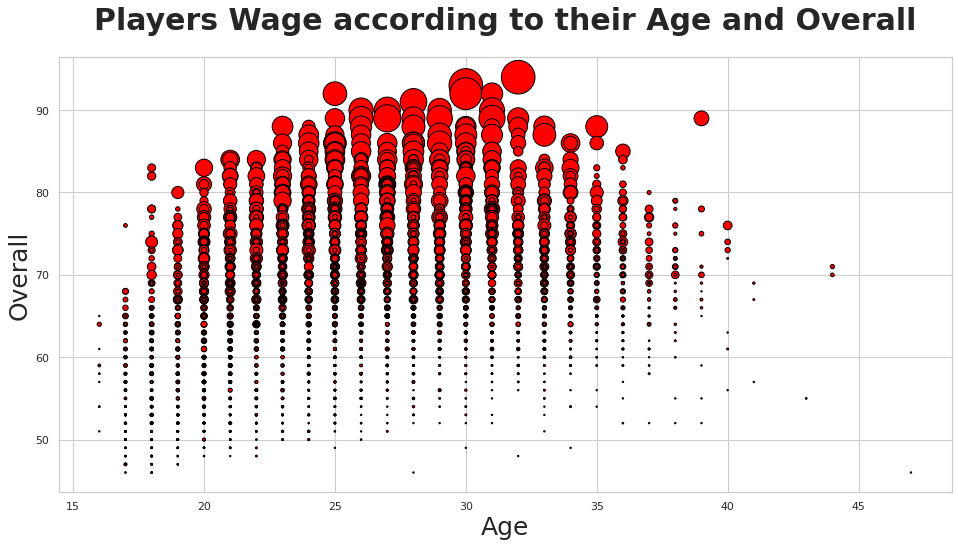

In [46]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

from the above plot, we also see that players are highly paid within the age of 23 to 35 and beyound that their wage reduce which would also mean, they are no longer performing as before.

# 4.  Top 5 players for every preferred position in terms of overall as well as potential points. Who was the best in 2018?



In [47]:
FIFA18['Preferred Positions'].head(10)

0     ST LW 
1        RW 
2        LW 
3        ST 
4        GK 
5        ST 
6        GK 
7        LW 
8    CDM CM 
9        ST 
Name: Preferred Positions, dtype: object

In [48]:
#since some players have more than 1 preffered position, let's create a list of each position a player prefers
#if a player prefers only one position, then his position will remain as single in the list
#List of preffered positions as strings
positions = list(FIFA18['Preferred Positions'].values)
print(positions[:10])

['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'ST ', 'GK ', 'LW ', 'CDM CM ', 'ST ']


In [49]:
#Split those with more than 2 positions into list items. e:g, ['ST LW'] would now be ['ST','LW']
list_positions = [j.strip().split(" ") for i,j in zip(positions,positions)]
print(list_positions[:10])

[['ST', 'LW'], ['RW'], ['LW'], ['ST'], ['GK'], ['ST'], ['GK'], ['LW'], ['CDM', 'CM'], ['ST']]


In [50]:
#Find unique positions, as in every position
u_positions = []
for lt in list_positions:
    u_positions+=lt
u_positions = list(set(u_positions))
#find the number of the unique position
print(len(u_positions),u_positions)


15 ['RWB', 'LWB', 'LM', 'RM', 'RB', 'CB', 'GK', 'CM', 'LW', 'CF', 'ST', 'CDM', 'CAM', 'RW', 'LB']


In [51]:
#Find the maximum number of positions a player can play
pos_max = max([len(lt) for lt in list_positions])
print(pos_max)


4


In [52]:
#Since the maximum number of positions is 4, then we an create 4 lists which hold each players'...
#preffered position such that some terms in every list won't be equal to another
l_pos = [j.strip().split(" ") for i,j in zip(positions,positions)] #This creates a list of list of positions
print(l_pos[:10])
round1 = []
for lst in l_pos:
    if len(lst) > 1:
        round1.append([lst.pop()])
    else:
        round1.append(lst)
print(round1[:10])

round2 = []
for lst in l_pos:
    if len(lst) > 1:
        round2.append([lst.pop()])
    else:
        round2.append(lst)
print(round2[:10])

round3 = []
for lst in l_pos:
    if len(lst) > 1:
        round3.append([lst.pop()])
    else:
        round3.append(lst)
print(round3[:10])         
round4 = l_pos
print(round4[:10])

[['ST', 'LW'], ['RW'], ['LW'], ['ST'], ['GK'], ['ST'], ['GK'], ['LW'], ['CDM', 'CM'], ['ST']]
[['LW'], ['RW'], ['LW'], ['ST'], ['GK'], ['ST'], ['GK'], ['LW'], ['CM'], ['ST']]
[['ST'], ['RW'], ['LW'], ['ST'], ['GK'], ['ST'], ['GK'], ['LW'], ['CDM'], ['ST']]
[['ST'], ['RW'], ['LW'], ['ST'], ['GK'], ['ST'], ['GK'], ['LW'], ['CDM'], ['ST']]
[['ST'], ['RW'], ['LW'], ['ST'], ['GK'], ['ST'], ['GK'], ['LW'], ['CDM'], ['ST']]


In [53]:
#We can also check if we are on the right Track
print(round1 != round2)
print(round2 != round3)
print(round3 != round4)


True
True
True


In [54]:
#let us add the new lists as columns of our dataframe, but convert the items in each list to a string 
#if we have ['ST'], then ''.join(['ST']) will yield 'ST'
FIFA18["Preffered 1"] = [''.join(ele) for ele in round1]
FIFA18["Preffered 2"] = [''.join(ele) for ele in round2]
FIFA18["Preffered 3"] = [''.join(ele) for ele in round3]
FIFA18["Preffered 4"] = [''.join(ele) for ele in round3]
#Our new DataFrame
print(FIFA18.head(5))


                Name  Age Nationality  Overall  Potential  \
0  Cristiano Ronaldo   32    Portugal       94         94   
1           L. Messi   30   Argentina       93         93   
2             Neymar   25      Brazil       92         94   
3         L. SuÃ¡rez   30     Uruguay       92         92   
4           M. Neuer   31     Germany       92         92   

                  Club  Value  Wage Preferred Positions Position     ValueNum  \
0       Real Madrid CF  95.5M  565K              ST LW        ST   95500000.0   
1         FC Barcelona   105M  565K                 RW        RW  105000000.0   
2  Paris Saint-Germain   123M  280K                 LW        LW  123000000.0   
3         FC Barcelona    97M  510K                 ST        ST   97000000.0   
4     FC Bayern Munich    61M  230K                 GK        GK   61000000.0   

    WageNum Preffered 1 Preffered 2 Preffered 3 Preffered 4  
0  565000.0          LW          ST          ST          ST  
1  565000.0          R

In [55]:
#Our positions are:
#  'CM', 'RM', 'LM', 'LW', 'LB', 'GK', 'RW', 'CAM', 'RB', 'CF', 'RWB', 'LWB', 'CB', 'ST', 'CDM'
#From the DataFrame i will select each position in the following columns ['Name','Overall','Potential'] then...
#Sort the values using the column that we want and set the name as index after selecting the best ...
#...5 players in each position
print("\n============")
print("CM Position")
print("============")
CM_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'CM') |
                                    (FIFA18['Preffered 2'] == 'CM') |
                                    (FIFA18['Preffered 3'] == 'CM') |
                                    (FIFA18['Preffered 4'] == 'CM')]
OverallCM = CM_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallCM)
PotentialCM = CM_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialCM)
print("============")

print("\n============")
print("RM Position")
print("============")
RM_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'RM') |
                                    (FIFA18['Preffered 2'] == 'RM') |
                                    (FIFA18['Preffered 3'] == 'RM') |
                                    (FIFA18['Preffered 4'] == 'RM')]
OverallRM = RM_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallRM)
PotentialRM = RM_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialRM)
print("============")

print("\n============")
print("LM Position")
print("============")
LM_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'LM') |
                                    (FIFA18['Preffered 2'] == 'LM') |
                                    (FIFA18['Preffered 3'] == 'LM') |
                                    (FIFA18['Preffered 4'] == 'LM')]
OverallLM = LM_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallLM)
PotentialLM = LM_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialLM)
print("============")

print("\n============")
print("LW Position")
print("============")
LW_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'LW') |
                                    (FIFA18['Preffered 2'] == 'LW') |
                                    (FIFA18['Preffered 3'] == 'LW') |
                                    (FIFA18['Preffered 4'] == 'LW')]
OverallLW = LW_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallLW)
PotentialLW = LW_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialLW)
print("============")

print("\n============")
print("LB Position")
print("============")
LB_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'LB') |
                                    (FIFA18['Preffered 2'] == 'LB') |
                                    (FIFA18['Preffered 3'] == 'LB') |
                                    (FIFA18['Preffered 4'] == 'LB')]
OverallLB = LB_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallLB)
PotentialLB = LB_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialLB)
print("============")

print("\n============")
print("GK Position")
print("============")
GK_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'GK') |
                                    (FIFA18['Preffered 2'] == 'GK') |
                                    (FIFA18['Preffered 3'] == 'GK') |
                                    (FIFA18['Preffered 4'] == 'GK')]
OverallGK = GK_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallGK)
PotentialGK = GK_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialGK)
print("============")

print("\n============")
print("RW Position")
print("============")
RW_FIFA18  = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'RW') |
                                    (FIFA18['Preffered 2'] == 'RW') |
                                    (FIFA18['Preffered 3'] == 'RW') |
                                    (FIFA18['Preffered 4'] == 'RW')]
OverallRW = RW_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallRW)
PotentialRW = RW_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialRW)
print("============")

print("\n============")
print("CAM Position")
print("============")
CAM_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'CAM') |
                                    (FIFA18['Preffered 2'] == 'CAM') |
                                    (FIFA18['Preffered 3'] == 'CAM') |
                                    (FIFA18['Preffered 4'] == 'CAM')]
OverallCAM = CAM_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallCAM)
PotentialCAM = CAM_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialCAM)
print("============")

print("\n============")
print("RB Position")
print("============")
RB_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'RB') |
                                    (FIFA18['Preffered 2'] == 'RB') |
                                    (FIFA18['Preffered 3'] == 'RB') |
                                    (FIFA18['Preffered 4'] == 'RB')]
OverallRB = RB_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallRB)
PotentialRB = RB_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialRB)
print("============")

print("\n============")
print("CF Position")
print("============")
CF_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'CF') |
                                    (FIFA18['Preffered 2'] == 'CF') |
                                    (FIFA18['Preffered 3'] == 'CF') |
                                    (FIFA18['Preffered 4'] == 'CF')]
OverallCF = CF_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallCF)
PotentialCF = CF_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialCF)
print("============")

print("\n============")
print("RWB Position")
print("============")
RWB_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'RWB') |
                                    (FIFA18['Preffered 2'] == 'RWB') |
                                    (FIFA18['Preffered 3'] == 'RWB') |
                                    (FIFA18['Preffered 4'] == 'RWB')]
OverallRWB = RWB_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallRWB)
PotentialRWB = RWB_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialRWB)
print("============")

print("\n============")
print("LWB Position")
print("============")
LWB_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'LWB') |
                                    (FIFA18['Preffered 2'] == 'LWB') |
                                    (FIFA18['Preffered 3'] == 'LWB') |
                                    (FIFA18['Preffered 4'] == 'LWB')]
OverallLWB = LWB_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallLWB)
PotentialLWB = LWB_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialLWB)
print("============")

print("\n============")
print("CB Position")
print("============")
CB_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'CB') |
                                    (FIFA18['Preffered 2'] == 'CB') |
                                    (FIFA18['Preffered 3'] == 'CB') |
                                    (FIFA18['Preffered 4'] == 'CB')]
OverallCB = CB_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallCB)
PotentialCB = CB_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialCB)
print("\n============")

      
print("ST Position")
print("============")
ST_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'ST') |
                                    (FIFA18['Preffered 2'] == 'ST') |
                                    (FIFA18['Preffered 3'] == 'ST') |
                                    (FIFA18['Preffered 4'] == 'ST')]
OverallST = ST_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallST)
PotentialST = ST_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialST)

print("\n============")
print("CDM Position")
print("============")
CDM_FIFA18 = FIFA18[['Name','Overall','Potential']][(FIFA18['Preffered 1'] == 'CDM') |
                                    (FIFA18['Preffered 2'] == 'CDM') |
                                    (FIFA18['Preffered 3'] == 'CDM') |
                                    (FIFA18['Preffered 4'] == 'CDM')]
OverallCDM = CDM_FIFA18[['Name','Overall']].sort_values('Overall',ascending = False).head(5).set_index('Name')
print(OverallCDM)
PotentialCDM = CDM_FIFA18[['Name','Potential']].sort_values('Potential',ascending = False).head(5).set_index('Name')
print(PotentialCDM)


CM Position
              Overall
Name                 
T. Kroos           90
L. ModriÄ‡         89
K. De Bruyne       89
Thiago             88
N. KantÃ©          87
              Potential
Name                   
P. Pogba             92
K. De Bruyne         92
M. Verratti          91
T. Kroos             90
Thiago               90

RM Position
               Overall
Name                  
K. De Bruyne        89
A. Robben           88
C. Eriksen          87
J. RodrÃ­guez       86
Isco                86
                Potential
Name                     
K. De Bruyne           92
Marco Asensio          92
C. Eriksen             91
Bernardo Silva         91
Isco                   90

LM Position
             Overall
Name                
A. SÃ¡nchez       89
David Silva       87
Iniesta           87
C. Eriksen        87
Alex Sandro       86
               Potential
Name                    
Marco Asensio         92
T. Lemar              91
L. SanÃ©              91
C. Eriksen            91

# 5. Which club(s) has the maximum share of players from England? Which club(s) has the maximum share of players from Spain? Which club(s) have the maximum share of players from Germany?



## 5.1 England

In [56]:
England_data = FIFA18[FIFA18['Nationality'] == "England"]['Club'].value_counts()

#Passing the series into a dataframe and adding column names  
England_data = pd.DataFrame({'Clubs':England_data.index, 'Maximun Number of prayers from England':England_data.values})

England_data[0:10]


,Clubs,Maximun Number of prayers from England
0,Shrewsbury,24
1,Bolton Wanderers,24
2,Colchester United,22
3,Exeter City,22
4,Burton Albion,22
5,Mansfield Town,22
6,Chesterfield,22
7,Port Vale,22
8,Portsmouth,22
9,Doncaster Rovers,21


In [57]:
Spain_data = FIFA18[FIFA18['Nationality'] == "Spain"]['Club'].value_counts()
#Passing the series into a dataframe and adding column names  
Spain_data = pd.DataFrame({'Clubs':Spain_data.index, 'Maximun Number of prayers from Spain':Spain_data.values})

Spain_data[0:10]


,Clubs,Maximun Number of prayers from Spain
0,CA Osasuna,27
1,Athletic Club de Bilbao,26
2,Lorca Deportiva CF,25
3,Real Valladolid,25
4,UD Las Palmas,25
5,RCD Espanyol,24
6,Real Sporting de GijÃ³n,24
7,SD Eibar,24
8,CD Lugo,24
9,Levante UD,24


In [58]:
Germany_data = FIFA18[FIFA18['Nationality'] == "Germany"]['Club'].value_counts()
#Passing the series into a dataframe and adding column names  
Germany_data = pd.DataFrame({'Clubs':Germany_data.index, 'Maximun Number of prayers from Germany':Germany_data.values})

Germany_data[0:10]



,Clubs,Maximun Number of prayers from Germany
0,Holstein Kiel,26
1,Chemnitzer FC,23
2,SSV Jahn Regensburg,23
3,FC Carl Zeiss Jena,23
4,SpVgg Unterhaching,23
5,Karlsruher SC,23
6,FSV Zwickau,23
7,Hallescher FC,23
8,1. FC Magdeburg,23
9,SV Meppen,23


# 6. As a National coach of the France team, you want to compare the national team of England, Spain, Italy, and Germany to understand the competition. The formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3 forwards, 1 Goal Keeper) and players with an overall value of more than 75 are preferred, now form the best team for each of the mentioned countries and compare them. Note down all the insights that you as a business analyst should share with the coach.



## 6.1 Squad of Highest Overall Players


In [59]:
def get_best_squad(formation):
    FIFA18_copy = FIFA18.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [60]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position            Player Overall Age                Club Value Wage
      GK          M. Neuer      92  31    FC Bayern Munich   61M 230K
      RB          Carvajal      84  25      Real Madrid CF   32M 195K
      CB      Sergio Ramos      90  31      Real Madrid CF   52M 310K
      CB      G. Chiellini      89  32            Juventus   38M 225K
      LB           Marcelo      87  29      Real Madrid CF   38M 250K
     CDM          T. Kroos      90  27      Real Madrid CF   79M 340K
      CM         N. KantÃ©      87  26             Chelsea 52.5M 190K
     CAM          Coutinho      86  25           Liverpool   56M 205K
      RW          L. Messi      93  30        FC Barcelona  105M 565K
      ST Cristiano Ronaldo      94  32      Real Madrid CF 95.5M 565K
      LW            Neymar      92  25 Paris Saint-Germain  123M 280K


In [61]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position            Player Overall Age              Club Value Wage
      GK          M. Neuer      92  31  FC Bayern Munich   61M 230K
      RB          Carvajal      84  25    Real Madrid CF   32M 195K
      CB      Sergio Ramos      90  31    Real Madrid CF   52M 310K
      CB      G. Chiellini      89  32          Juventus   38M 225K
      LB           Marcelo      87  29    Real Madrid CF   38M 250K
      RM      K. De Bruyne      89  26   Manchester City   83M 285K
      CM         N. KantÃ©      87  26           Chelsea 52.5M 190K
      CM          A. Vidal      87  30  FC Bayern Munich 37.5M 160K
      LM        C. Eriksen      87  25 Tottenham Hotspur   65M 165K
      ST Cristiano Ronaldo      94  32    Real Madrid CF 95.5M 565K
      ST        L. SuÃ¡rez      92  30      FC Barcelona   97M 510K


In [62]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position            Player Overall Age             Club Value Wage
      GK          M. Neuer      92  31 FC Bayern Munich   61M 230K
      RB          Carvajal      84  25   Real Madrid CF   32M 195K
      CB      Sergio Ramos      90  31   Real Madrid CF   52M 310K
      CB      G. Chiellini      89  32         Juventus   38M 225K
      LB           Marcelo      87  29   Real Madrid CF   38M 250K
     CDM          T. Kroos      90  27   Real Madrid CF   79M 340K
     CDM        L. ModriÄ‡      89  31   Real Madrid CF   57M 340K
     CAM          Coutinho      86  25        Liverpool   56M 205K
     CAM     R. Nainggolan      86  29             Roma 42.5M 130K
     CAM    Cesc FÃ bregas      86  30          Chelsea   41M 210K
      ST Cristiano Ronaldo      94  32   Real Madrid CF 95.5M 565K


**studying different squad's impact on Nationality teams**

In [63]:
# modifying the above get_summary and get_best_squad functions for Nationality

def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA18_copy = FIFA18.copy()
    FIFA18_copy = FIFA18_copy[FIFA18_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [64]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

**making our squad choices more strict:**



In [65]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [66]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

### 6.2 France
exploring the different squad possibility of France and how it affects the ratings:

In [67]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

print (France)

               Squad  Overall  Potential
Nationality                             
France         3-4-3    84.55      89.55
France         4-4-2    84.00      89.91
France       4-3-1-2    84.55      89.64
France         4-3-3    84.64      89.91
France       4-2-3-1    84.55      89.91


Has seen above, France has the best squard as 4-3-3 for the current squad; and 4-4-2, 4-3-3, and 4-2-3-1 for the future squad based on team ratings.

In [68]:
# printing the best 11 squad line-up of France for the current rating
rating_433_France_Overall, best_list_433_France_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_France_Overall))
print(best_list_433_France_Overall)

-Overall-
Average rating: 84.6
Position       Player Overall Age                    Club Value Wage
      GK    H. Lloris      88  30       Tottenham Hotspur   38M 165K
      RB     K. Zouma      79  22              Stoke City   15M  96K
      CB    R. Varane      85  24          Real Madrid CF 46.5M 175K
      CB   A. Laporte      84  23 Athletic Club de Bilbao 35.5M  36K
      LB   L. Kurzawa      80  24     Paris Saint-Germain 16.5M  69K
      CM    N. KantÃ©      87  26                 Chelsea 52.5M 190K
     CDM     P. Pogba      87  24       Manchester United 66.5M 195K
      CM   B. Matuidi      85  30                Juventus 28.5M 145K
      RM   F. Thauvin      82  24  Olympique de Marseille   28M  40K
      ST   K. Benzema      86  29          Real Madrid CF 44.5M 295K
      LW A. Griezmann      88  26        AtlÃ©tico Madrid   75M 150K


In [69]:
# printing the best 11 squad line-up of France for the potential rating

rating_433_France_Potential, best_list_433_France_Potential = get_best_squad_n(squad_433_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_France_Potential))
print(best_list_433_France_Potential)

-Potential-
Average rating: 89.9
Position        Player Potential Age                    Club Value Wage
      GK     A. Lafont        89  18             Toulouse FC 11.5M  10K
      RB      K. Zouma        86  22              Stoke City   15M  96K
      CB     R. Varane        92  24          Real Madrid CF 46.5M 175K
      CB    A. Laporte        89  23 Athletic Club de Bilbao 35.5M  36K
      LB L. HernÃ¡ndez        88  21        AtlÃ©tico Madrid 13.5M  36K
     CDM      P. Pogba        92  24       Manchester United 66.5M 195K
     CAM  O. DembÃ©lÃ©        92  20            FC Barcelona   40M 150K
      CM     N. KantÃ©        90  26                 Chelsea 52.5M 190K
      RM      A. PlÃ©a        86  24                OGC Nice 20.5M  41K
      ST    K. MbappÃ©        94  18     Paris Saint-Germain 41.5M  31K
      LW  A. Griezmann        91  26        AtlÃ©tico Madrid   75M 150K


### 3.3 Germany


In [70]:
Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Germany.set_index('Nationality', inplace = True)
Germany[['Overall', 'Potential']] = Germany[['Overall', 'Potential']].astype(float)

print (Germany)

               Squad  Overall  Potential
Nationality                             
Germany        3-4-3    86.27      88.55
Germany        4-4-2    85.09      88.36
Germany      4-3-1-2    85.36      88.00
Germany        4-3-3    86.27      88.55
Germany      4-2-3-1    86.09      88.55


Germany's current ratings peak with either 3-4-3 or 4-3-3 formation, with 3-4-3,4-3-3 and 4-2-3-1 being their best option for future rating .

In [71]:
# printing the best 11 squad line-up of Germany for the current rating

rating_433_Germany_Overall, best_list_433_Germany_Overall = get_best_squad_n(squad_433_strict, 'Germany', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_Germany_Overall))
print(best_list_433_Germany_Overall)

-Overall-
Average rating: 86.3
Position        Player Overall Age              Club Value Wage
      GK      M. Neuer      92  31  FC Bayern Munich   61M 230K
      RB   A. RÃ¼diger      82  24           Chelsea 24.5M 105K
      CB    J. Boateng      88  28  FC Bayern Munich   48M 215K
      CB    M. Hummels      88  28  FC Bayern Munich   48M 215K
      LB     J. Hector      80  27       1. FC KÃ¶ln   14M  42K
     CDM      T. Kroos      90  27    Real Madrid CF   79M 340K
     CDM I. GÃ¼ndoÄŸan      85  26   Manchester City   46M 190K
     CDM    S. Khedira      84  30          Juventus   29M 160K
      RW      M. Ã–zil      88  28           Arsenal   60M 265K
      ST    T. MÃ¼ller      86  27  FC Bayern Munich 47.5M 190K
      LW       M. Reus      86  28 Borussia Dortmund   45M 120K


In [72]:
# printing the best 11 squad line-up of Germany for the potential rating

rating_433_Germany_Potential, best_list_433_Germany_Potential = get_best_squad_n(squad_433_strict, 'Germany', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_Germany_Potential))
print(best_list_433_Germany_Potential)

-Potential-
Average rating: 88.5
Position      Player Potential Age                Club Value Wage
      GK    M. Neuer        92  31    FC Bayern Munich   61M 230K
      RB A. RÃ¼diger        86  24             Chelsea 24.5M 105K
      CB    N. SÃ¼le        89  21    FC Bayern Munich 30.5M  78K
      CB  J. Boateng        88  28    FC Bayern Munich   48M 215K
      LB B. Henrichs        86  20 Bayer 04 Leverkusen   11M  36K
     CDM    T. Kroos        90  27      Real Madrid CF   79M 340K
     CDM L. Goretzka        88  22       FC Schalke 04   30M  46K
     CAM   J. Brandt        88  21 Bayer 04 Leverkusen   22M  49K
      RW    M. Ã–zil        88  28             Arsenal   60M 265K
      CF  K. Havertz        88  18 Bayer 04 Leverkusen    8M  25K
      LM    L. SanÃ©        91  21     Manchester City 34.5M 125K


### 6.4 Spain


In [73]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Spain.set_index('Nationality', inplace = True)
Spain[['Overall', 'Potential']] = Spain[['Overall', 'Potential']].astype(float)

print (Spain)

               Squad  Overall  Potential
Nationality                             
Spain          3-4-3    86.27      88.82
Spain          4-4-2    86.45      88.73
Spain        4-3-1-2    86.55      88.09
Spain          4-3-3    86.64      89.00
Spain        4-2-3-1    86.64      89.00


Spain does best with either 4-3-3 or 4-2-3-1 for both current and potential rating.

In [74]:
# printing the best 11 squad line-up of Spain for the current rating

rating_433_Spain_Overall, best_list_433_Spain_Overall = get_best_squad_n(squad_433_strict, 'Spain', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_Spain_Overall))
print(best_list_433_Spain_Overall)

-Overall-
Average rating: 86.6
Position          Player Overall Age              Club Value Wage
      GK          De Gea      90  26 Manchester United 64.5M 215K
      RB        Carvajal      84  25    Real Madrid CF   32M 195K
      CB    Sergio Ramos      90  31    Real Madrid CF   52M 310K
      CB          PiquÃ©      87  30      FC Barcelona 37.5M 240K
      LB      Jordi Alba      85  28      FC Barcelona 30.5M 215K
     CDM          Thiago      88  26  FC Bayern Munich 70.5M 225K
      CM Sergio Busquets      86  28      FC Barcelona   36M 250K
     CDM  Javi MartÃ­nez      86  28  FC Bayern Munich   36M 165K
      RM       Juan Mata      84  29 Manchester United 30.5M 195K
      ST     Diego Costa      86  28           Chelsea   46M 235K
      LM     David Silva      87  31   Manchester City   44M 220K


In [75]:
# printing the best 11 squad line-up of Spain for the potential rating

rating_433_Spain_Potential, best_list_433_Spain_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_Spain_Potential))
print(best_list_433_Spain_Potential)


-Potential-
Average rating: 89.0
Position            Player Potential Age              Club Value Wage
      GK            De Gea        92  26 Manchester United 64.5M 215K
      RB HÃ©ctor BellerÃ­n        88  22           Arsenal   21M  91K
      CB      Sergio Ramos        90  31    Real Madrid CF   52M 310K
      CB            PiquÃ©        87  30      FC Barcelona 37.5M 240K
      LB       Azpilicueta        87  27           Chelsea 37.5M 160K
     CDM            Thiago        90  26  FC Bayern Munich 70.5M 225K
     CAM     Dani Ceballos        88  20    Real Madrid CF 16.5M 105K
     CDM    Diego Llorente        87  23     Real Sociedad   16M  29K
      RM             SaÃºl        90  22  AtlÃ©tico Madrid   32M  59K
      ST            Morata        88  24           Chelsea   41M 170K
      LW     Marco Asensio        92  21    Real Madrid CF   46M 175K


### 6.5 England


In [76]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Overall', 'Potential']] = England[['Overall', 'Potential']].astype(float)

print (England)

               Squad  Overall  Potential
Nationality                             
England        3-4-3    82.64      87.18
England        4-4-2    82.64      87.27
England      4-3-1-2    82.27      86.73
England        4-3-3    82.73      87.36
England      4-2-3-1    82.36      87.36


England have to stick to 4-3-3 with their current squad and either 4-3-3 or 4-2-3-1 with their potential squad.

In [77]:
# printing the best 11 squad line-up of England for the current rating

rating_433_England_Overall, best_list_433_England_Overall = get_best_squad_n(squad_433_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_England_Overall))
print(best_list_433_England_Overall)

-Overall-
Average rating: 82.7
Position       Player Overall Age              Club Value Wage
      GK      J. Hart      82  30   West Ham United   14M 110K
     RWB    K. Walker      83  27   Manchester City   24M 130K
      CB    G. Cahill      84  31           Chelsea   21M 160K
      CB     M. Keane      81  24           Everton   21M  91K
     LWB      D. Rose      82  26 Tottenham Hotspur   21M  99K
      CM   A. Lallana      83  29         Liverpool   25M 135K
      CM      E. Dier      82  23 Tottenham Hotspur   25M  85K
      CM J. Henderson      82  27         Liverpool 21.5M 115K
      RW   R. Barkley      81  23           Everton   24M 105K
      ST      H. Kane      86  23 Tottenham Hotspur   59M 165K
      LM      D. Alli      84  21 Tottenham Hotspur   43M 115K


In [78]:
# printing the best 11 squad line-up of England for the potential rating
rating_433_England_Potential, best_list_433_England_Potential = get_best_squad_n(squad_433_strict, 'England', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_England_Potential))
print(best_list_433_England_Potential)

-Potential-
Average rating: 87.4
Position                Player Potential Age              Club Value Wage
      GK            J. Butland        87  24        Stoke City   18M  50K
     RWB A. Oxlade-Chamberlain        85  23         Liverpool   20M 105K
      CB              M. Keane        87  24           Everton   21M  91K
      CB             J. Stones        85  23   Manchester City 14.5M 105K
      LB               L. Shaw        84  21 Manchester United   14M  91K
      CM              A. Gomes        90  16 Manchester United  975K   9K
      CM               E. Dier        87  23 Tottenham Hotspur   25M  85K
     CAM            M. Edwards        87  18 Tottenham Hotspur  1.2M  11K
      RM           M. Rashford        89  19 Manchester United   22M  74K
      ST               H. Kane        90  23 Tottenham Hotspur   59M 165K
      LM               D. Alli        90  21 Tottenham Hotspur   43M 115K


## 6.6 Italy

In [79]:
Italy = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Italy'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Italy.set_index('Nationality', inplace = True)
Italy[['Overall', 'Potential']] = Italy[['Overall', 'Potential']].astype(float)

print (Italy)

               Squad  Overall  Potential
Nationality                             
Italy          3-4-3    84.36      88.18
Italy          4-4-2    83.45      87.82
Italy        4-3-1-2    84.09      87.64
Italy          4-3-3    84.18      88.00
Italy        4-2-3-1    83.82      87.64


In [80]:
# printing the best 11 squad line-up of Italy for the current rating

rating_433_Italy_Overall, best_list_433_Italy_Overall = get_best_squad_n(squad_433_strict, 'Italy', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_Italy_Overall))
print(best_list_433_Italy_Overall)

-Overall-
Average rating: 84.2
Position       Player Overall Age                Club Value Wage
      GK    G. Buffon      89  39            Juventus  4.5M 110K
      RB   M. Darmian      80  27   Manchester United 13.5M 120K
      CB G. Chiellini      89  32            Juventus   38M 225K
      CB   L. Bonucci      88  30               Milan   44M 210K
      LB      Emerson      76  22                Roma  8.5M  48K
     CDM  M. Verratti      87  24 Paris Saint-Germain 64.5M 130K
     CDM C. Marchisio      85  31            Juventus   33M 160K
     CDM  D. De Rossi      83  33                Roma 10.5M  73K
      RW   D. Berardi      81  22            Sassuolo 24.5M  62K
      ST   A. Belotti      83  23              Torino   37M  58K
      LW   L. Insigne      85  26              Napoli   45M 115K


In [81]:
rating_433_Italy_Potential, best_list_433_Italy_Potential = get_best_squad_n(squad_433_strict, 'Italy', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_Italy_Potential))
print(best_list_433_Italy_Potential)

-Potential-
Average rating: 88.0
Position          Player Potential Age                Club Value Wage
      GK   G. Donnarumma        94  18               Milan 28.5M  35K
      RB        A. Conti        83  23               Milan   10M  64K
      CB    G. Chiellini        89  32            Juventus   38M 225K
      CB      L. Bonucci        88  30               Milan   44M 210K
      LB      A. Barreca        86  22              Torino   10M  31K
     CDM     M. Verratti        91  24 Paris Saint-Germain 64.5M 130K
      CM      M. Benassi        86  22          Fiorentina 17.5M  64K
     CDM    M. Locatelli        86  19               Milan  8.5M  35K
      RW      D. Berardi        87  22            Sassuolo 24.5M  62K
      ST      A. Belotti        90  23              Torino   37M  58K
      LM F. Bernardeschi        88  23            Juventus 30.5M 110K



## 4 - Final Comparison
comparison between these 5 Nationality with the current rating of players for these strongest contenders for World Cup 2018.

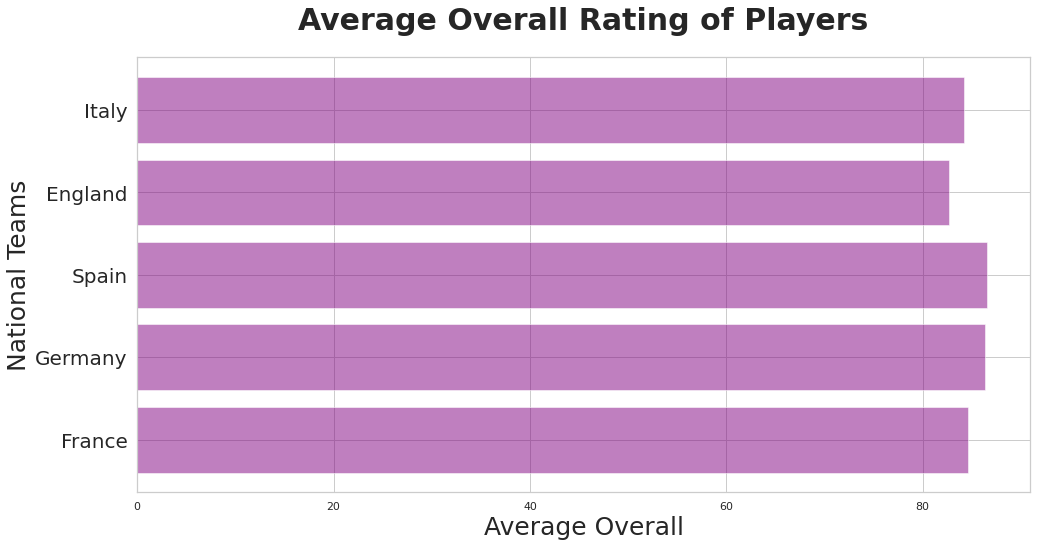

In [82]:
teams = ('France', 'Germany', 'Spain', 'England', 'Italy')
index = np.arange(len(teams))
average_overall = [84.6, 86.3, 86.6, 82.7, 84.2]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5, color='purple')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

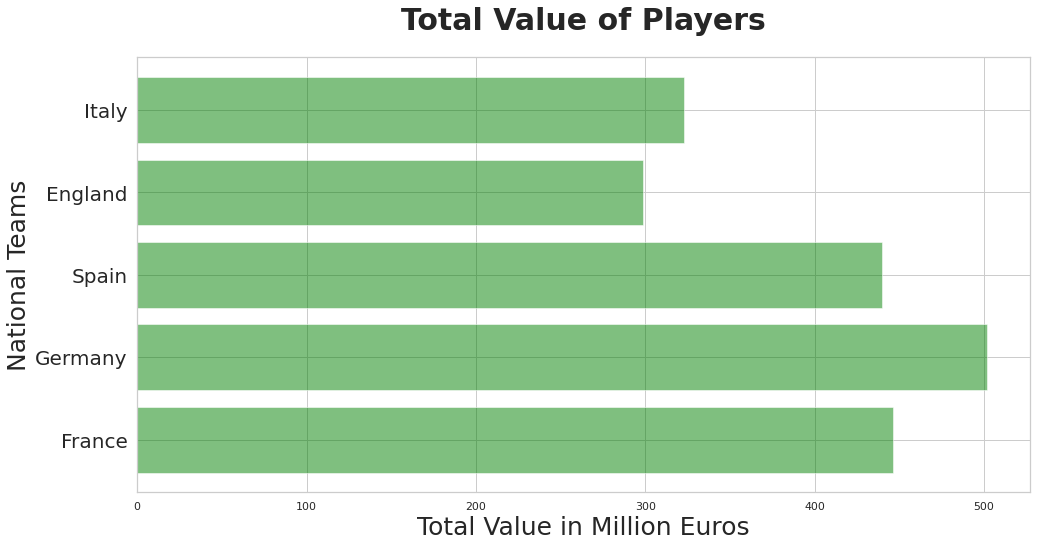

In [83]:
total_value = [446.5, 502, 440, 298.5, 323]

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

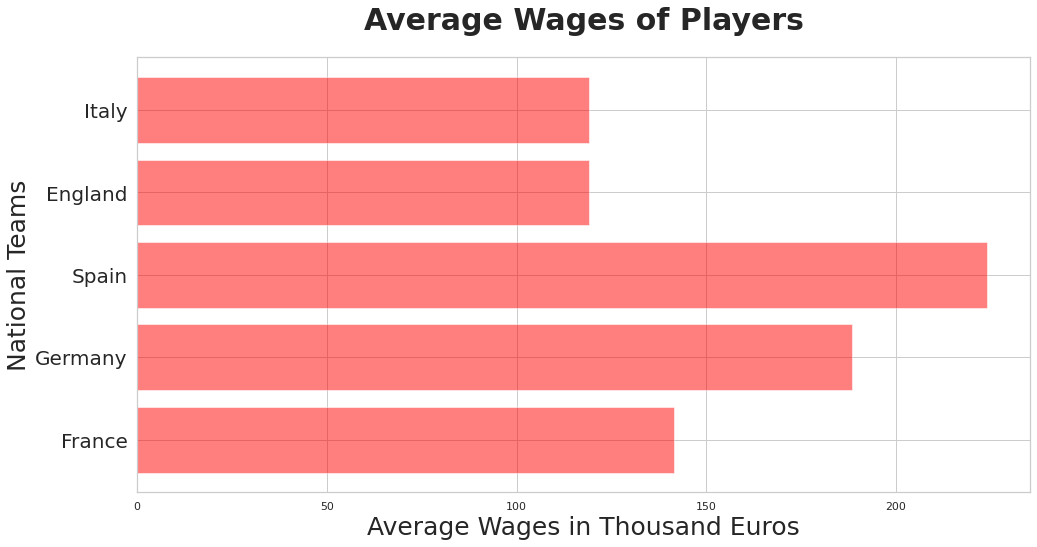

In [84]:
average_wage = [141.4, 188.4, 224.1, 119.1, 119.2]

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

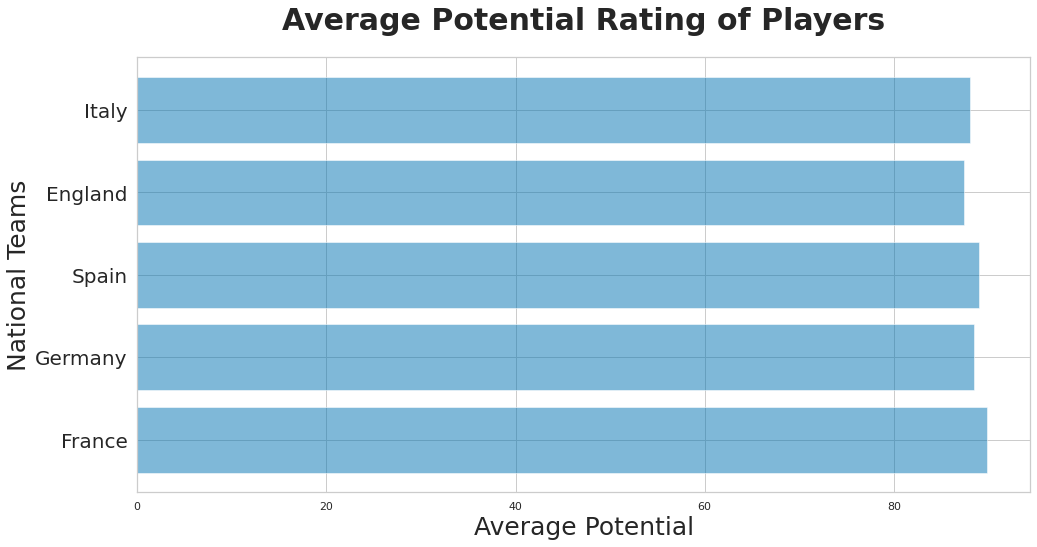

In [85]:
teams = ('France', 'Germany', 'Spain', 'England', 'Italy')
index = np.arange(len(teams))
average_potential = [89.9, 88.5, 89.0, 87.4, 88.0]

plt.figure(figsize=(16,8))
plt.barh(index, average_potential, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Potential', fontsize=25)
plt.title('Average Potential Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

## Conclusion
So based purely on the FIFA 18 Data:
* Spain has the highest average overall rating, followed by France and Germany. 
* Germany has the highest total value, followed by Spain and France. 
* Spain has the highest average wage, followed by Germany and France
* Looking at the potential, France is still slightly the strongest among the rest closely followed by spain and Germany. 

